In [1]:
import pandas as pd
import re
import string
import jieba
import matplotlib.pyplot as plt
import re
import numpy as np
plt.rcParams['font.sans-serif'] = ['SimHei']  # 中文格式设置为黑体

In [10]:
data_train

,数据编号,文本,情绪标签
0,1,气死姐姐了，快二是阵亡了吗，尼玛，一个半小时过去了也没上车,0
1,2,妞妞啊，今天又承办了一个发文登记文号是126~嘻~么么哒~晚安哟,2
2,3,这里还值得注意另一个事实，就是张鞠存原有一个东溪草堂为其读书处。,3
3,4,这在前华约国家(尤其是东德)使用R-73的首次联合演习期间，被一些北约组织的飞行员所证实。,3
4,5,TinyThief上wii了？！,5
...,...,...,...
27763,27764,生日礼物你也已经收到了，那么就在说一句：生日快乐,2
27764,27765,自我、霸道、任性、不服从才是真正的我，百顺百从、没有想法那个她不是我，我只是一直在忍着，只想...,4
27765,27766,心情本来就不好，某只猪还不同意我年休，还说我一还好今天晚上不用参加考试,0
27766,27767,为何如此糟糕？@姚志宏DD？半年，我们10个同事中，2家遭到入室盗窃，住在财经大学的李家被洗...,0


In [7]:
data_train = pd.read_excel("/home/aistudio/work/评测数据集/train/usual_train.xlsx") #训练集
data_test=pd.read_excel("/home/aistudio/work/评测数据集/test（最终评测集）/真实评测集/usual_test_labeled.xlsx") #测试集
data_eval=pd.read_excel("/home/aistudio/work/评测数据集/eval（刷榜数据集）/usual_eval_labeled.xlsx") #验证集
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27768 entries, 0 to 27767
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   数据编号    27768 non-null  int64 
 1   文本      27766 non-null  object
 2   情绪标签    27768 non-null  object
dtypes: int64(1), object(2)
memory usage: 650.9+ KB


In [3]:
data_train["情绪标签"].value_counts()

angry       8344
neutral     5749
happy       5379
sad         4990
surprise    2086
fear        1220
Name: 情绪标签, dtype: int64

/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


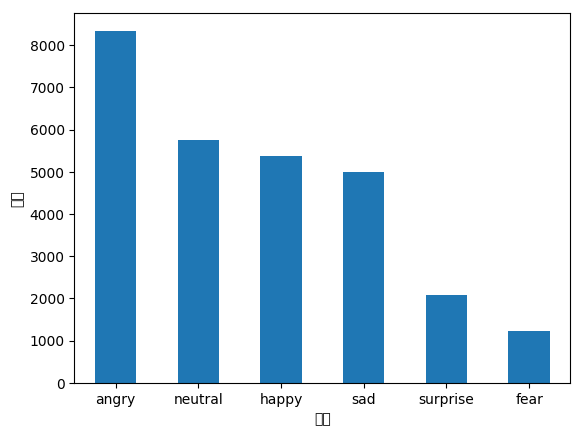

In [4]:
data_train["情绪标签"].value_counts().plot(kind='bar')
plt.xlabel("情绪")
plt.ylabel("数量")
plt.xticks(rotation=0)
plt.savefig("情绪标签分布.jpg",dpi=600,bbox_inches='tight')
plt.show()

In [8]:
data_train.dropna(inplace=True)#去除训练集所有缺失值

#标签内容转换
def transfer(motion):
    emotion_map={"angry":0,"fear":1,"happy":2,"neutral":3,"sad":4,"surprise":5}
    return emotion_map[motion]
data_train["情绪标签"]=data_train.apply(lambda x:transfer(x["情绪标签"]),axis=1)
data_test["情绪标签"]=data_test.apply(lambda x:transfer(x["情绪标签"]),axis=1)
data_eval["情绪标签"]=data_eval.apply(lambda x:transfer(x["情绪标签"]),axis=1)

#去除话题名
data_train['文本'] = data_train['文本'].apply(lambda x: re.sub(r'#.*?#', '', x))
data_test['文本'] = data_test['文本'].apply(lambda x: re.sub(r'#.*?#', '', x))
data_eval['文本'] = data_eval['文本'].apply(lambda x: re.sub(r'#.*?#', '', x))



In [9]:
data_train.to_excel('/home/aistudio/work/评测数据集/train/usual_train.xlsx', index=False)
data_test.to_excel('/home/aistudio/work/评测数据集/test（最终评测集）/真实评测集/usual_test_labeled.xlsx', index=False)
data_eval.to_excel('/home/aistudio/work/评测数据集/eval（刷榜数据集）/usual_eval_labeled.xlsx', index=False)


In [17]:
data_train

,数据编号,文本,情绪标签
0,1,气死姐姐了，快二是阵亡了吗，尼玛，一个半小时过去了也没上车,0
1,2,妞妞啊，今天又承办了一个发文登记文号是126~嘻~么么哒~晚安哟,2
2,3,这里还值得注意另一个事实，就是张鞠存原有一个东溪草堂为其读书处。,3
3,4,这在前华约国家(尤其是东德)使用R-73的首次联合演习期间，被一些北约组织的飞行员所证实。,3
4,5,TinyThief上wii了？！,5
...,...,...,...
27763,27764,生日礼物你也已经收到了，那么就在说一句：生日快乐,2
27764,27765,自我、霸道、任性、不服从才是真正的我，百顺百从、没有想法那个她不是我，我只是一直在忍着，只想...,4
27765,27766,心情本来就不好，某只猪还不同意我年休，还说我一还好今天晚上不用参加考试,0
27766,27767,为何如此糟糕？@姚志宏DD？半年，我们10个同事中，2家遭到入室盗窃，住在财经大学的李家被洗...,0


In [18]:
#数据准备
train_sentence=np.array(data_train["文本"])
train_label=np.array(data_train["情绪标签"])
eval_sentence=np.array(data_eval["文本"])
eval_label=np.array(data_eval["情绪标签"])
test_sentence=np.array(data_test["文本"])
test_label=np.array(data_test["情绪标签"])

In [22]:
print("训练集文本最长样本长度：" + str(np.max(np.array([len(x) for x in train_sentence]))))
print("测试集文本最长样本长度：" + str(np.max(np.array([len(x) for x in test_sentence]))))
print("验证集文本最长样本长度：" + str(np.max(np.array([len(x) for x in eval_sentence]))))

训练集文本最长样本：212
测试集文本最长样本：331
验证集文本最长样本：162


In [2]:
class BertDataSet(Dataset):
    def __init__(self, data, label, tokenizer):
        self.data = data
        self.label = label
        self.input_data = tokenizer(
            [sentence for sentence in data],
            max_seq_len=512, 
            pad_to_max_seq_len=True
        )

    def __len__(self):
        return len(self.label)

    def __getitem__(self, item):
        return {
            "input_ids": self.input_data['input_ids'][item],
            "token_type_ids": self.input_data['token_type_ids'][item],
            "labels": self.label[item],
        }

NameError: name 'Dataset' is not defined

In [27]:
import time
class TokenItem:
    def __init__(self,sentence,tokenizer):
        self.tokenizer=tokenizer
        self.token=tokenizer(
            [sentence],
            max_seq_len=512,
            pad_to_max_seq_len=True
        )
    def __del__(self):
        pass

In [29]:
def get_test_acc():
    model1=AutoModelForSequenceClassification.from_pretrained("./work/best_model1/",num_classes=6)
    ans = []
    tokenizer=AutoTokenizer.from_pretrained("bert-base-chinese")
    with paddle.no_grad():
        for i in range(len(test_label)):
            tokenItem=TokenItem(test_sentence[i],tokenizer)
            outputs = model1(input_ids=paddle.to_tensor(tokenItem.token.input_ids,dtype='int64'),
                            token_type_ids=paddle.to_tensor(tokenItem.token.token_type_ids,dtype='int64'))
            del tokenItem
            result = paddle.argmax(outputs[0])
            del outputs
            ans.append(result)
            # print(i)
            if i % 100 == 0:
                print("已处理", i, "条")
    return ans

In [3]:
ans=get_test_acc()

NameError: name 'get_test_acc' is not defined

In [1]:
import paddle
paddle.utils.run_check()

Running verify PaddlePaddle program ... 
PaddlePaddle works well on 1 GPU.
PaddlePaddle is installed successfully! Let's start deep learning with PaddlePaddle now.
